In [1]:
from clickhouse_driver import Client
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
pd.set_option('display.max_columns', None) # Вывод всех столбцов
pd.set_option('display.max_rows', None) # Вывод всех строк

In [2]:
client = Client(host='oleg.orbita.work', port=9000, user='student_ml', password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})

## 1. Загрузите данные из таблицы `house_train`, которая находится в базе `students_datas`

Создадим SQL-запрос для загрузки данных из таблицы `house_train`

In [3]:
query = "SELECT * FROM students_datas.house_train"

In [4]:
df = client.query_dataframe(query)

Выведем часть таблицы

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


## 2. Приведите описание датасета

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int16   
 1   MSSubClass     1460 non-null   int16   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   object  
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

#### 2.1. Сколько данных в датасете?

In [7]:
print("Количество строк:")
len(df.index)

Количество строк:


1460

In [8]:
print("Количество столбцов:")
len(df.columns)

Количество столбцов:


81

In [9]:
print("Количество ячеек:")
df.size

Количество ячеек:


118260

Таблица имеет 1460 строк и 81 столбец. Общее количество ячеек - 118260

#### 2.2. Сколько параметров? Выведите список всех параметров

In [10]:
print("Количество параметров:")
len(df.columns)

Количество параметров:


81

In [11]:
print("Список параметров:")
print(*df.columns, sep = '\n')

Список параметров:
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


В таблице имеется 81 параметр

#### 2.3. Есть ли категориальные признаки? Перечислите/выведите их

In [12]:
print("Количество категориальных признаков:")
len(df.select_dtypes(include=['category', 'object']).columns)

Количество категориальных признаков:


46

In [13]:
print("Список категориальных признаков:")
print(*df.select_dtypes(include=['category', 'object']).columns, sep = '\n')

Список категориальных признаков:
MSZoning
LotFrontage
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


В таблице имеется 46 категориальных признаков

#### 2.4. Выведите первые пять строчек `DataFrame`

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


## 3. Проверьте, есть ли пропуски и повторы в данных

#### 3.1. Удалите повторы

Для начала узнаем, сколько повторов в данных

In [15]:
print("Количество повторов:")
df.duplicated().sum()

Количество повторов:


np.int64(0)

В данных нет повторов, удалять ничего не нужно

#### 3.2. Удалите столбцы, в которых пропущено более 15% данных

Для начала узнаем, сколько пропусков в данных

In [16]:
print("Количество пропусков по столбцам:")
df.isnull().sum()

Количество пропусков по столбцам:


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
print("Общее количество пропусков:")
df.isnull().sum().sum()

Общее количество пропусков:


np.int64(7829)

Подсчитаем процент пропусков

In [18]:
print("Процент пропусков по столбцам:")
(df.isnull().sum() / len(df)) * 100

Процент пропусков по столбцам:


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

Удалим столбцы, в которых более 15% пропусков

In [19]:
df = df.dropna(axis=1, thresh=int(0.85 * len(df)))

Проверим, что пропуски были удалены - выведем количество и процент пропусков еще раз

In [20]:
print("Количество пропусков по столбцам после удаления:")
df.isnull().sum()

Количество пропусков по столбцам после удаления:


Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0


In [21]:
print("Общее количество пропусков после удаления:")
df.isnull().sum().sum()

Общее количество пропусков после удаления:


np.int64(601)

In [22]:
print("Процент пропусков по столбцам после удаления:")
(df.isnull().sum() / len(df)) * 100

Процент пропусков по столбцам после удаления:


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir  

В результате проведенных действий были удалены столбцы `LotFrontage`, `Alley`, `MasVnrType`, `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`. Общее количество пропусков уменьшилось с 7829 до 601

## 4. Постройте гистограмму параметра `SalePrace`. Подчиняется ли распределение нормальному?

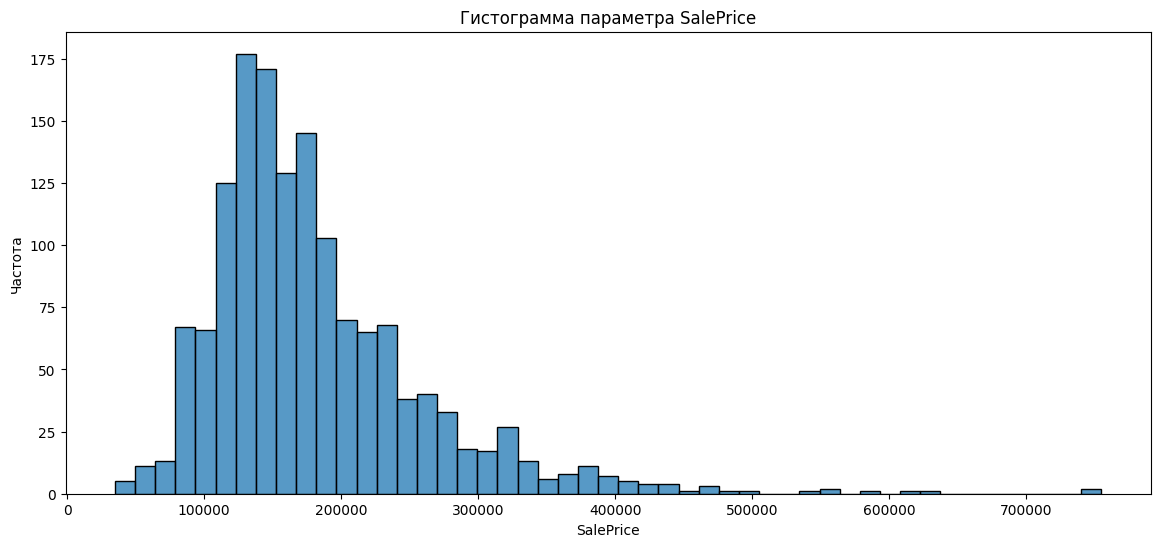

In [23]:
plt.figure(figsize=(14,6))
sns.histplot(df['SalePrice'])
plt.title('Гистограмма параметра SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

Чтобы проверить, подчиняется ли распределение нормальному, можно использовать различные тесты:
- Тест Колмогорова-Смирнова
- Тест Шапиро-Уилка
- Тест Андерсона-Дарлинга
- Тест Д’Агостино-Пирсона
- и другие
  
Чтобы узнать, подчиняется ли распределение нормальному, проведем **тест Андерсона-Дарлинга**, т. к. данный тест лучше других работает с большими выборками.  
Данный тест проверяет, насколько хорошо выборка соответствует определённому распределению (в нашем случае нормальному):
- Нулевая гипотеза ($H_0$): данные подчиняются нормальному распределению
- Альтернативная гипотеза ($H_1$): данные не подчиняются нормальному распределению
  
В рамках данного теста сравниваются 2 функции - эмпирическая (т. е. основанная на реальных данных) и теоретическая (т. е. заданная, в нашем случае нормальная). Далее строится специальная статистика $A^2$, которая измеряет расстояние между этими двумя функциями. Полученная статистика $A^2$ сравнивается с критическими значениями для данного объема выборки. Если $A^2$ превышает критическое значение для выбранного уровня значимости (обычно 5%), нулевая гипотеза отвергается.  
Критическое значение $A^2$ при уровне значимости 5% и большом объеме выборки - 0.787

In [24]:
test = df['SalePrice']
a2 = anderson(test, dist='norm')
print('a^2:')
a2.statistic

a^2:


np.float64(41.69199630641606)

$A^2 = 41.7 >> 0.787$ - $A^2$ намного больше критического значения, следовательно нулевая гипотеза о нормальности отвергается. Распределение не подчиняется нормальному

## 5. Построить коробочную диаграмму (ящик с усами) признака `SalePrice` всех домов в данных

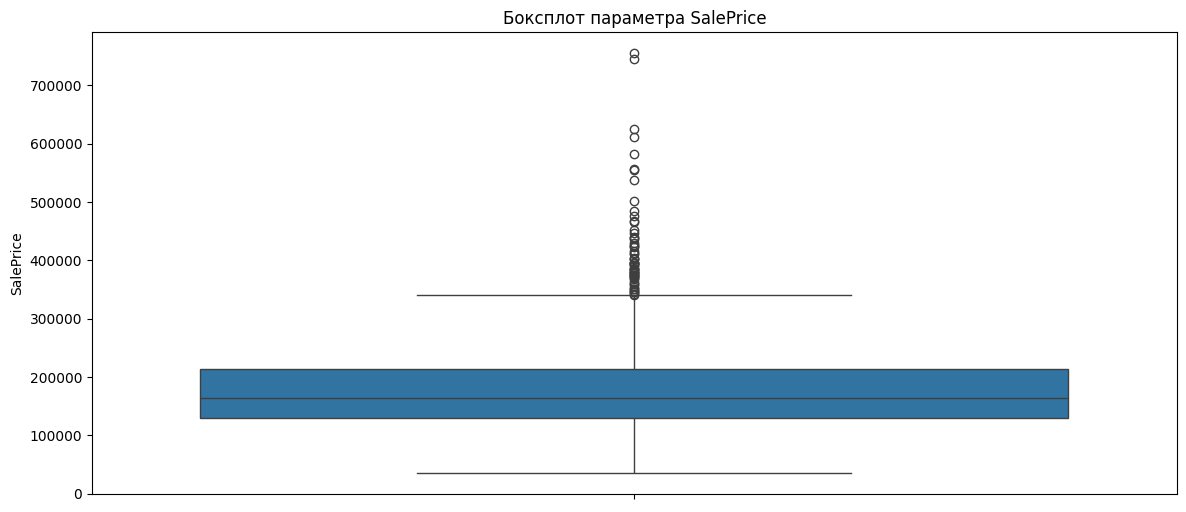

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(y=df['SalePrice'])
plt.title('Боксплот параметра SalePrice')
plt.ylabel('SalePrice')
plt.show()

**Ящик (box)** представляет собой диапазон от 1 квартиля ($Q1$) до 3 квартиля ($Q3$). Это межквартильный размах ($IQR$), который содержит 50% данных.  
**1 квартиль** ($Q1$) - значение, ниже которого находится 25% данных.  
**2 квартиль** ($Q2$) - это **медиана** (линия внутри ящика), которая делит данные пополам - 50% данных ниже медианы и 50% данных выше медианы.  
**3 квартиль** ($Q3$) - значение, ниже которого находится 75% данных.  
**Усы** - это линии, выходящие из коробки. Они показывают диапазон данных, которые не являются выбросами. Усы тянутся до максимальных значений данных, которые находятся в пределах $1.5 * IQR$ от квартилей.  
Кружки - это **выбросы**, которые находятся за пределами усов и существенно отличаются от остальной массы данных. Эти данные выходят за пределы $1.5 * IQR$, что делает их статистически значимыми отклонениями от остальной части данных.

Исходя из данного боксплота мы можем сделать выводы:
1. Распределение цен на продажу (SalePrice) имеет правую асимметрию, так как "усы" графика и медиана смещены влево, а выбросы расположены в правой части. Это означает, что большинство объектов продаются по относительно низким ценам, но есть и дорогие объекты, которые значительно превышают средний уровень.
2. Медиана (линия внутри прямоугольника) находится ближе к нижней границе прямоугольника, что подтверждает наличие правой асимметрии. Примерное значение медианы - около 180 000.
3. Межквартильный размах ($IQR$) охватывает центральные 50% данных. Его границы примерно соответствуют 130 000 (нижний квартиль, $Q1$) и 210 000 (верхний квартиль, $Q3$). Это означает, что основная масса цен сосредоточена в этом диапазоне.
4. На графике видны многочисленные выбросы справа (значения выше 340 000), что указывает на наличие дорогих объектов, значительно отклоняющихся от типичного диапазона цен.

## 6. Постройте гистограммы и боксплоты по группам

#### 6.1. С кондиционером (`CentralAir`) и без кондиционера

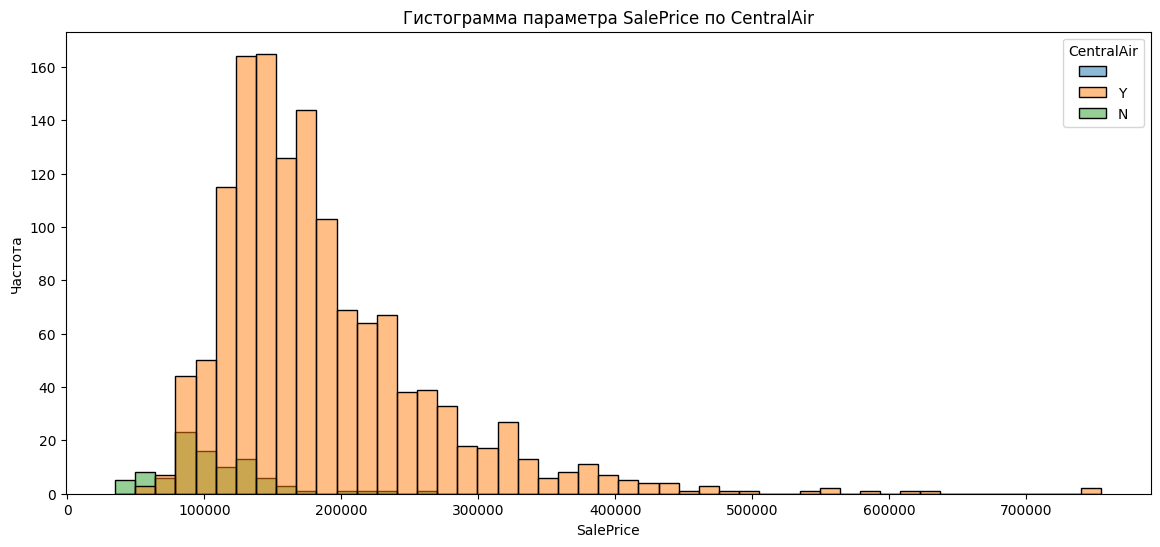

In [26]:
plt.figure(figsize=(14,6))
sns.histplot(df, x='SalePrice', hue='CentralAir')
plt.title('Гистограмма параметра SalePrice по CentralAir')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

Исходя из данной гистограммы мы можем сделать выводы:
- Дома с центральным кондиционированием (`Y`) представлены в гораздо большем количестве по сравнению с домами без него (`N`), что видно по высоте столбцов гистограммы.
- Дома без центрального кондиционирования (`N`) в среднем дешевле, чем дома с центральным кондиционированием (`Y`).
- Дома без центрального кондиционирования (`N`) в основном находятся в нижнем ценовом сегменте (до 200 000), а дома с центральным кондиционированием охватывают весь диапазон цен, включая самые дорогие варианты (более 700 000)

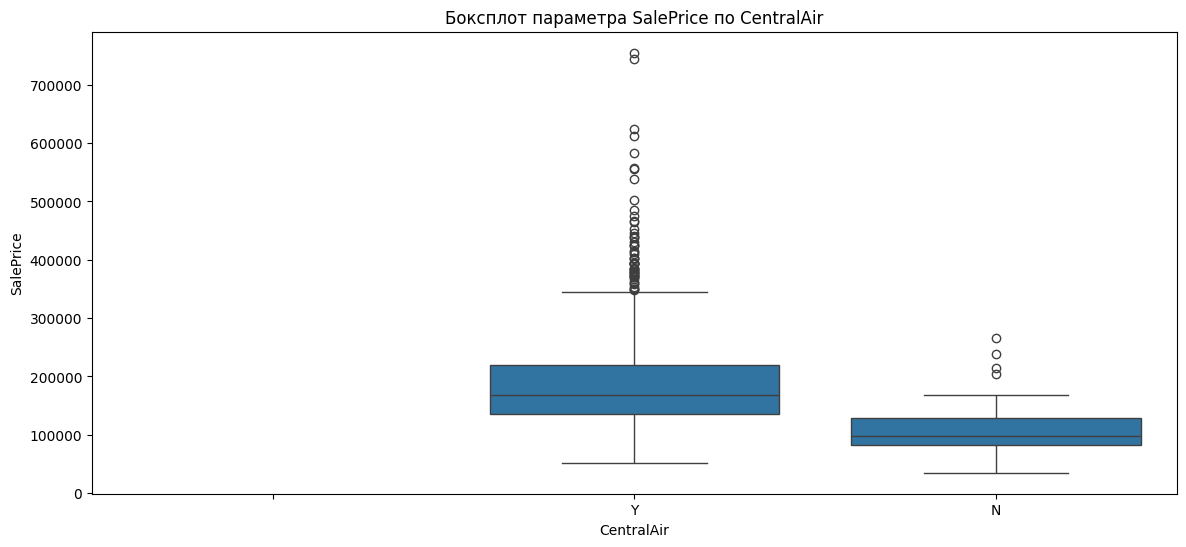

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.title('Боксплот параметра SalePrice по CentralAir')
plt.xlabel('CentralAir')
plt.ylabel('SalePrice')
plt.show()

Исходя из данного боксплота мы можем сделать выводы:
- Медианная цена домов с центральным кондиционированием (`CentralAir = 1`) выше, чем у домов без него (`CentralAir = 0`). Это указывает на то, что наличие центрального кондиционирования положительно влияет на стоимость жилья.
- У домов с `CentralAir = 1` разброс цен (диапазон между первым и третьим квартилями) шире, чем у домов без кондиционирования. Это означает, что в этой категории присутствуют как более дешевые, так и дорогие варианты. У домов с `CentralAir = 0` цены сосредоточены в более узком диапазоне.
- В обеих группах присутствуют выбросы (точки за пределами "усов" боксплота), особенно заметные среди домов с кондиционированием.
- Наличие центрального кондиционирования ассоциируется с более высоким уровнем цен.

#### 6.2. Цены продажи домов (параметр `SalePrice`), сгруппированные по размеру гаража (параметр `GarageCars`)

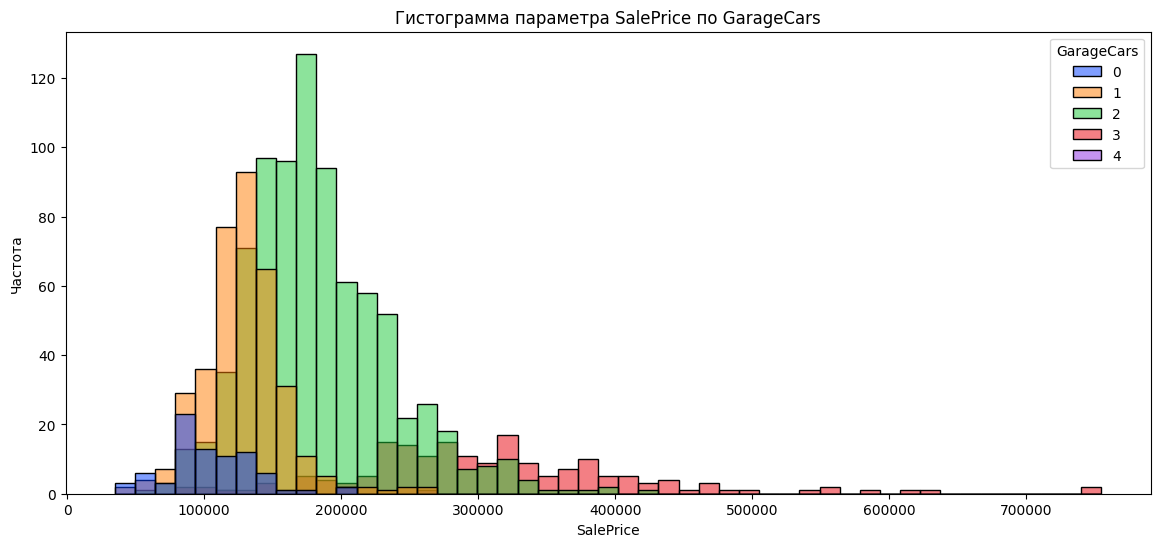

In [28]:
plt.figure(figsize=(14, 6))
sns.histplot(df, x='SalePrice', hue='GarageCars', palette='bright')
plt.title('Гистограмма параметра SalePrice по GarageCars')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

Исходя из данной диаграммы мы можем сделать выводы:
- Наибольшее количество домов имеют 1 или 2 машины в гараже (самые высокие столбцы на гистограмме). Дома с 3 машинами встречаются реже. Варианты с 0 и 4 машинами встречаются крайне редко (очень низкие столбцы).
- Дома с 0 и 1 машиной демонстрируют более низкие цены (столбцы смещены влево).
- Дома с 2 машинами в гараже охватывают широкий диапазон цен, включая как средние, так и высокие значения.
- Дома с 3 машинами демонстрируют более высокие цены (столбцы смещены вправо).
- Дома с 4 машинами имеют малое количество наблюдений, что затрудняет выводы.

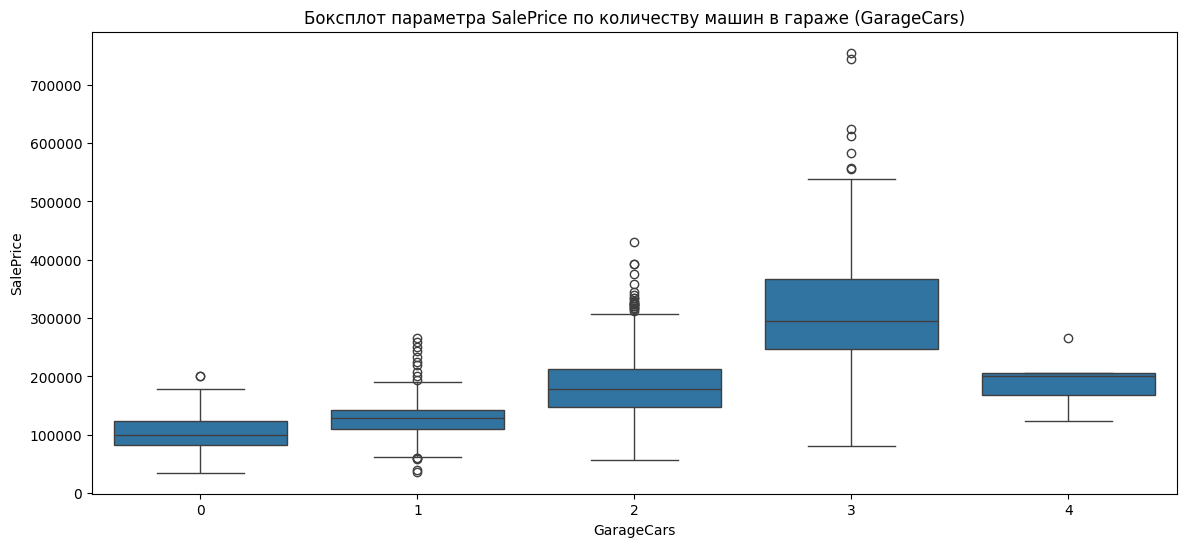

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Боксплот параметра SalePrice по количеству машин в гараже (GarageCars)')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

Исходя из данного боксплота можно сделать выводы:
- Чем больше машин помещается в гараж, тем выше медианная цена дома.
- Для 0 машин в гараже цены самые низкие, с узким разбросом и небольшим количеством выбросов.
- Для 1 машины медианная цена выше, чем для 0 машин, но разброс значений шире.
- Для 2 машин медианная цена значительно выше, а разброс значений становится ещё шире. Это самая распространённая категория, что видно по количеству наблюдений.
- Для 3 машин медианные цены продолжают расти, но количество наблюдений уменьшается. Разброс остаётся значительным. Наличие 3 машин в гараже характерно для дорогих домов. В данных могут быть редкие выбросы.
- Для 4 машин мало наблюдений, что затрудняет выводы.

## 7. Постройте гистограмму частот

#### 7.1. Частот размеров гаража

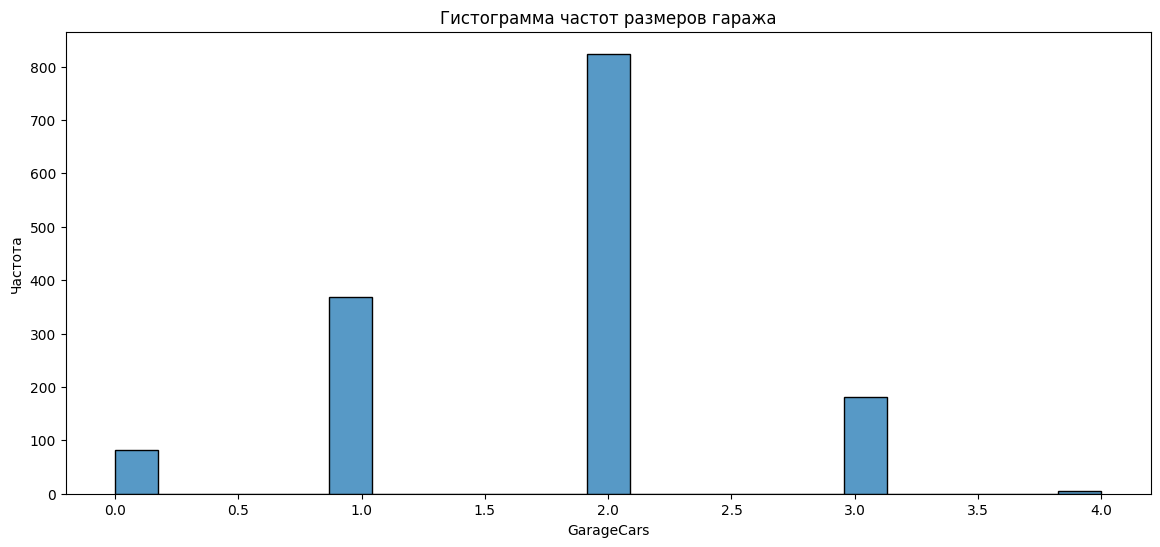

In [30]:
plt.figure(figsize=(14, 6))
sns.histplot(df['GarageCars'])
plt.title('Гистограмма частот размеров гаража')
plt.xlabel('GarageCars')
plt.ylabel('Частота')
plt.show()

Исходя из данной гистограммы мы можем сделать выводы:
- Наиболее распространённый размер гаража — 2 машины. Это видно по самому высокому столбцу (частота около 800).
- Гаражи на 1 машину встречаются значительно реже (частота около 300).
- Остальные гаражи встречаются еще реже.
- Распределение данных является асимметричным (скошено вправо), так как основная масса данных сосредоточена на меньших значениях (1-2 машины), а большие значения (3-4 машины) встречаются редко.

#### 7.2. Частот центрального кондиционирования

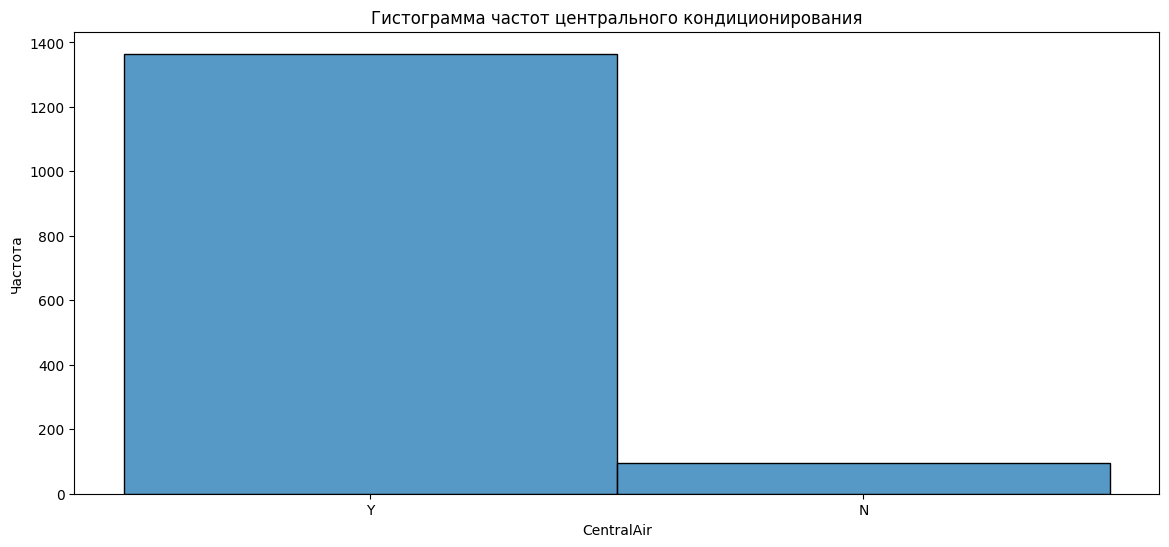

In [31]:
plt.figure(figsize=(14, 6))
sns.histplot(df['CentralAir'])
plt.title('Гистограмма частот центрального кондиционирования')
plt.xlabel('CentralAir')
plt.ylabel('Частота')
plt.show()

По данной гистограмме можно сделать вывод, что количество домов с центральным кондиционированием (`СentralAir`) значительно выше, чем без него.

## 8. Рассчитайте долю домов

#### 8.1. С продажной ценой между 25-м процентилем и 75-м процентилем

In [32]:
# Вычислим 25-й и 75-й процентили
lower_percentile = np.percentile(df['SalePrice'], 25)
upper_percentile = np.percentile(df['SalePrice'], 75)

# Отберем дома с ценой между 25-м и 75-м процентилем
percentile_range = df[(df['SalePrice'] >= lower_percentile) & (df['SalePrice'] <= upper_percentile)]

# Рассчитаем долю домов
percentage = len(percentile_range) / len(df)
print(f"Доля домов с продажной ценой между 25-м процентилем и 75-м процентилем: {percentage:.1%}")

Доля домов с продажной ценой между 25-м процентилем и 75-м процентилем: 50.2%


#### 8.2. Рассчитайте долю домов с общей площадью в квадратных футах от 25-го процентиля до 75-го процентиля

Под общей площадью понимаем сумму параметров `GrLivArea` (жилая площадь) и `TotalBsmtSF` (площадь подвала)

In [33]:
# Вычислим 25-й и 75-й процентили
lower_percentile = np.percentile(df['GrLivArea'] + df['TotalBsmtSF'], 25)
upper_percentile = np.percentile(df['GrLivArea'] + df['TotalBsmtSF'], 75)

# Отберем дома с общей площадью между 25-м и 75-м процентилем
percentile_range = df[(df['GrLivArea'] + df['TotalBsmtSF'] >= lower_percentile) & (df['GrLivArea'] + df['TotalBsmtSF'] <= upper_percentile)]

# Рассчитаем долю домов
percentage = len(percentile_range) / len(df)
print(f"Доля домов с общей площадью в квадратных футах от 25-го процентиля и 75-го процентиля: {percentage:.1%}")

Доля домов с общей площадью в квадратных футах от 25-го процентиля и 75-го процентиля: 50.1%


## 9. Получите ковариационную матрицу для всех данных `DataFrame` и используйте анализ тепловой карты. Выведите 10 параметров с наибольшей корреляцией 

In [34]:
# Получаем корреляционную матрицу
matrix = df.corr(numeric_only=True)

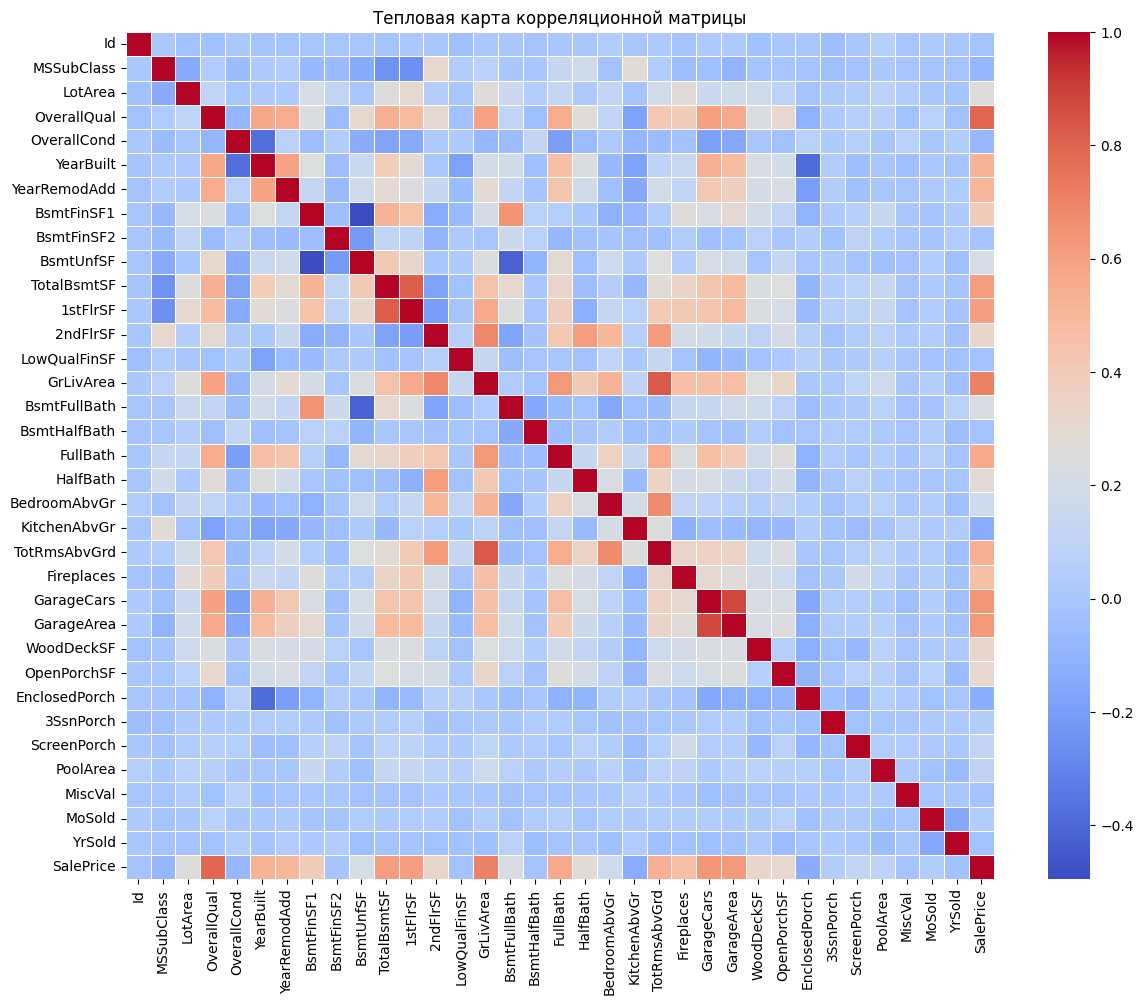

In [35]:
# Строим тепловую карту корреляционную матрицы
plt.figure(figsize=(14, 11))
sns.heatmap(matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

In [36]:
param = matrix['SalePrice'].sort_values(ascending=False)
param = param[param != 1] # удаляем 1 параметр - корреляцию SalePrice с самим собой, которая всегда равна 1
print("10 параметров с наибольшей корреляцией:")
param.head(10)

10 параметров с наибольшей корреляцией:


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64